# Machine Learning 13: Polynomial Regression

**Polynomial Regression** is a type of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$th-degree polynomial. It is a form of linear regression where the features are transformed to allow for a nonlinear relationship.

---

### 🔢 Polynomial Regression Equation

The model is usually represented as:

$$
y = \beta_0 + \beta_1x + \beta_2x^2 + \dots + \beta_nx^n + \epsilon
$$

* $y$: Target/output
* $x$: Input/feature
* $\beta_0, \beta_1, \dots, \beta_n$: Coefficients
* $\epsilon$: Error term

---

### 🧠 Why Use Polynomial Regression?

* It fits **nonlinear relationships** using a **linear model in higher dimensions**.
* Useful when data shows **curved trends** (e.g., U-shape, S-shape).
* Better than simple linear regression for more **complex patterns**.

---

### ⚙️ How It Works

1. **Feature Transformation**: Add polynomial terms like $x^2, x^3, \dots, x^n$ as new features.
2. **Linear Regression**: Fit a linear model on the new feature set.
3. **Model Evaluation**: Use metrics like RMSE, $R^2$, and visualization to evaluate the fit.

---
### ⚠️ Tips

* **Overfitting Risk**: High-degree polynomials can fit the training data too well but generalize poorly.
* Use **cross-validation** and **regularization** (like Ridge/Lasso) if needed.
* Scale features for numerical stability in higher-degree polynomials.

---

Let me know if tumi want to see a real dataset example or explore regularization, evaluation metrics, or implementation in R.


### 📂 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### These libraries help with:

- Data handling (pandas, numpy)
- Plotting (matplotlib)
- Building the regression model (scikit-learn)

### 📥 2. Load and Explore Dataset

In [2]:
df = pd.read_csv("salary p.csv")
df.columns = df.columns.str.strip()  # Remove whitespace
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


### 📊 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [4]:
print("Column names:", df.columns)
print("Unique Levels:", df['Level'].unique())
print("Correlation Matrix:\n", df.corr())

Column names: Index(['Level', 'Salary'], dtype='object')
Unique Levels: [ 1  2  3  4  5  6  7  8  9 10]
Correlation Matrix:
           Level   Salary
Level   1.00000  0.72064
Salary  0.72064  1.00000


### 📈 4. Data Visualization

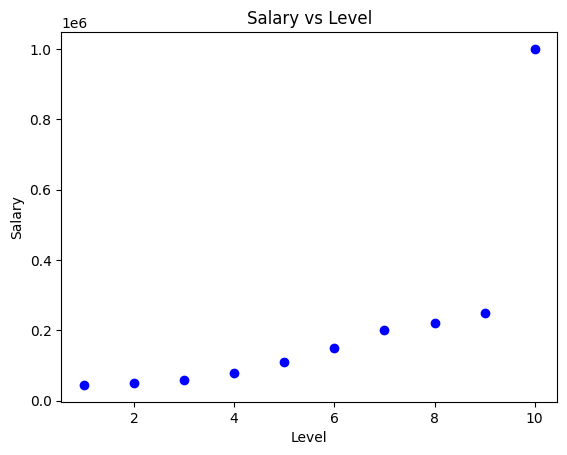

In [5]:
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level")
plt.show()

### 🔀 5. Prepare Features and Target

In [6]:
X = df[['Level']].values
y = df['Salary'].values

Separates features (X) and labels (y).

### 📈 6. Train Linear Regression Model (Baseline)

In [7]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

### 🔁 7. Polynomial Feature Transformation

In [8]:
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X)

- Converts X to polynomial features up to degree 7.
- Example: for x=5, the features become [1, 5, 25, 125, 625, 3125, 15625, 78125]

### ✂️ 8. Split the Dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

- Splits data into training and testing sets (80/20 split).

### 🤖 9. Train the Model

In [10]:
lrp = LinearRegression()
lrp.fit(x_train, y_train)

LinearRegression()

- Fits the linear model using the polynomial features.

### 📏 10. Evaluate the Model

In [11]:
print("R^2 Score:", lrp.score(x_test, y_test))
print("Coefficients:", lrp.coef_)
print("Intercept:", lrp.intercept_)

R^2 Score: 0.934450422974077
Coefficients: [ 0.00000000e+00  1.91157158e+06 -1.54958830e+06  6.35303174e+05
 -1.45496592e+05  1.89218485e+04 -1.30412264e+03  3.69268095e+01]
Intercept: -824444.5140032023


Provides:

- R² score (goodness of fit)
- Model coefficients
- Intercept

### 🎨 11.Visualize the Polynomial Regression Curve

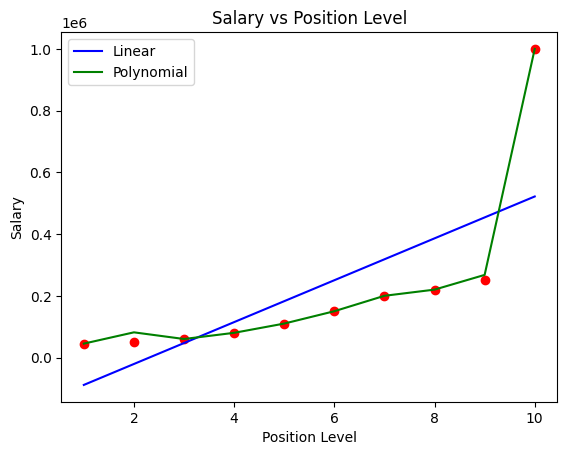

In [12]:
plt.scatter(X, y, color='red')

plt.plot(X, lr.predict(X), color='blue', label='Linear')

plt.plot(X, lrp.predict(X_poly), color='green', label='Polynomial')

plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


Shows:

- Actual data (red)
- Linear model (blue)
- Polynomial model (green)

In [13]:
# m1x1 + m2x2^2 +c 

You're referring to this expression:

$$
-142886.16449972 \cdot x_1 + 20665.98360656 \cdot x_2^2 + 244024.5195025443
$$

### 📌 **What this represents**

This looks like a **simplified polynomial regression equation** (likely a quadratic model — degree 2) of the form:

$$
y = \beta_1 x + \beta_2 x^2 + \beta_0
$$

Where:

* $x_1 = x$
* $x_2 = x$ as well, but for the $x^2$ term (after polynomial transformation)
* $\beta_1 = -142886.16449972$
* $\beta_2 = 20665.98360656$
* $\beta_0 = 244024.5195025443$ (intercept)

---

### 🧮 **Rewriting with $x$ notation**

$$
y = -142886.16 \cdot x + 20665.98 \cdot x^2 + 244024.52
$$

---

### 📊 **Interpretation**

* The negative linear term suggests salary *initially* decreases with level.
* The positive quadratic term dominates for higher $x$, causing a curve upwards (U-shape).
* The intercept $244024.52$ is the base prediction when $x = 0$, though in this context, level 0 may not make sense.

---


### ✅ Predict Salary

In [14]:
test = poly_reg.fit_transform([[5]])
test

array([[1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03, 1.5625e+04, 7.8125e+04]])

In [15]:
lrp.predict(test)

array([110000.00029168])

Makes a salary prediction for a person at level 5 using the trained polynomial model.

### 🔎 Sample Equation Interpretation

In [16]:
-(142886.16449972)*5+ 20665.98360656*25 + 244024.52

46243.287665399985